Install and import all necessary libraries.

In [ ]:
pip install numpy

In [ ]:
pip install sklearn

In [ ]:
import pickle

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing



1. Fetch all files from the Google Drive.
2. Filter each file such that only the nonzero values will be considered.
3. For optimization, limit the number of data points to 1000.
4. Combine all the appliances' data into one dataframe.





In [ ]:
def getData():
  # Upload Files
  import pandas as pd
  import numpy as np

  col_names = ['time', 'power']
  c7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ukdale/house_1/channel_7.dat', sep='\s+', names = col_names, header = None)
  c12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ukdale/house_1/channel_12.dat', sep='\s+', names = col_names, header = None)
  c14 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ukdale/house_1/channel_14.dat', sep='\s+', names = col_names, header = None)
  c9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ukdale/house_1/channel_9.dat', sep='\s+', names = col_names, header = None)
  # c4 = scaledDf.loc[scaledDf['channel'] == 'c4']
  c7 = c7[c7['power'] != 0]
  # c4.reset_index(drop=True, inplace=True)

  # c33 = scaledDf.loc[scaledDf['channel'] == 'c33']
  c12 = c12[c12['power'] != 0]
  # c33.reset_index(drop=True, inplace=True)

  # c7 = scaledDf.loc[scaledDf['channel'] == 'c7']
  c14 = c14[c14['power'] != 0]
  # c7.reset_index(drop=True, inplace=True)

  # c9 = scaledDf.loc[scaledDf['channel'] == 'c9']
  c9 = c9[c9['power'] != 0]
  # c9.reset_index(drop=True, inplace=True)

  #limit number of entries from each channel to 1000
  c7_lim = c7.loc[1:1000, ['power']]
  c12_lim = c12.loc[1:1000, ['power']]
  c14_lim = c14.loc[1:1000, ['power']]
  c9_lim = c9.loc[1:1000, ['power']]

  #combine to one dataframe 
  zero_df = pd.DataFrame(0, index = range(1000), columns = range(1))
  zero_df.index = np.arange(1, len(zero_df) + 1)

  #individual appliances
  df_c7 = pd.concat([c7_lim, c7_lim, zero_df, zero_df, zero_df], axis = 1)
  df_c7 = df_c7.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  df_c12 = pd.concat([c12_lim, zero_df, c12_lim,  zero_df, zero_df], axis = 1)
  df_c12 = df_c12.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  df_c14 = pd.concat([c14_lim, zero_df, zero_df, c14_lim, zero_df], axis = 1)
  df_c14 = df_c14.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  df_c9 = pd.concat([c9_lim, zero_df, zero_df, zero_df, c9_lim], axis = 1)
  df_c9 = df_c9.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  df = pd.concat([df_c7, df_c12, df_c14, df_c9], ignore_index=True)


  #all possible combinations by twos
  c7_12 = pd.concat([c7_lim + c12_lim, c7_lim, c12_lim, zero_df, zero_df], axis = 1)
  c7_12 = c7_12.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  c7_14 = pd.concat([c7_lim + c14_lim, c7_lim, zero_df,  c14_lim, zero_df], axis = 1)
  c7_14 = c7_14.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  c7_9 = pd.concat([c7_lim + c9_lim , c7_lim, zero_df,  zero_df, c9_lim ], axis = 1)
  c7_9 = c7_9 .set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)

  df = pd.concat([df, c7_12, c7_14, c7_9], axis = 0, ignore_index=True)

  c12_14 = pd.concat([c12_lim + c14_lim, zero_df, c12_lim, c14_lim, zero_df], axis = 1)
  c12_14 = c12_14.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  c12_9 = pd.concat([c12_lim + c9_lim, zero_df, c12_lim,  zero_df, c9_lim], axis = 1)
  c12_9 = c12_9.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)

  df = pd.concat([df, c12_14, c12_9], axis = 0, ignore_index=True)

  c14_9 = pd.concat([c14_lim + c9_lim, zero_df, zero_df,  c14_lim, c9_lim], axis = 1)
  c14_9 = c14_9.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)

  df = pd.concat([df, c14_9], axis = 0, ignore_index=True)
 
  #all possible combinations by threes
  c7_12_14 = pd.concat([c7_lim + c12_lim + c14_lim, c7_lim, c12_lim, c14_lim, zero_df], axis = 1)
  c7_12_14 = c7_12_14.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)
  c7_12_9 = pd.concat([c7_lim + c12_lim + c9_lim, c7_lim, c12_lim, zero_df, c9_lim], axis = 1)
  c7_12_9 = c7_12_9.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)

  df = pd.concat([df, c7_12_14, c7_12_9], axis = 0, ignore_index=True)

  c7_14_9 = pd.concat([c7_lim + c14_lim + c9_lim, c7_lim, zero_df, c14_lim, c9_lim], axis = 1)
  c7_14_9 = c7_14_9.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)

  df = pd.concat([df, c7_14_9], axis = 0, ignore_index=True)

  #all possible combinations by four and five
  c7_12_14_9 = pd.concat([c7_lim + c12_lim + c14_lim + c9_lim, c7_lim, c12_lim,  c14_lim, c9_lim], axis = 1)
  c7_12_14_9 = c7_12_14_9.set_axis(["total", "c7", "c12", "c14", "c9"], axis = 1)

  df = pd.concat([df, c7_12_14_9], axis = 0, ignore_index=True)

  return df

In [ ]:
def labelData():
  import numpy as np
  import pandas as pd
  from math import isnan

  df = getData()
  for i, rows in df.iterrows():
    if rows.c7 < 10 or isnan(rows.c7):
      df.c7.iloc[i] = 0
  # c2_lim = c2_lim[c2_lim['power'] >= 10]
  for i, rows in df.iterrows():
    if rows.c12 < 10 or isnan(rows.c12):
      df.c12.iloc[i] = 0
  # c7_lim = c7_lim[c7_lim['power'] >= 10]
  for i, rows in df.iterrows():
    if rows.c14 < 10 or isnan(rows.c14):
      df.c14.iloc[i] = 0  
  # c34_lim = c34_lim[c34_lim['power'] >= 10]
  for i, rows in df.iterrows():
    if rows.c9 < 10 or isnan(rows.c9):
      df.c9.iloc[i] = 0  
  # df = minMaxScaler(df)
  for i, rows in df.iterrows():
    if rows.total < 10 or isnan(rows.total):
      df.total.iloc[i] = 0   
  # df = minMaxScaler(df)
  device_list = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/labels9.dat', header = None)

  device = pd.DataFrame('', index = range(1000), columns = range(1))
  device.index = np.arange(1, len(device) + 1)
  count = 0
  for i in device_list.iterrows():
    new = pd.DataFrame(i[1][0], index = range(1000), columns = range(1))
    new.index = np.arange(1, len(new) + 1)
    device = pd.concat([device, new], axis = 0, ignore_index = True)

  device = device.drop(device.index[0:1000])
  device.reset_index(inplace = True)
  device.drop('index', axis=1, inplace=True)

  #combine label column to df
  df = pd.concat([df, device], axis = 1, ignore_index = True)

  df = df.set_axis(["total", "c7", "c12", "c14", "c9", "channel"], axis = 1)
  df = df.sample(frac=1).reset_index(drop=True)

  return df

In [ ]:
#FUNCTIONALITY CHECK
df = labelData()
df.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


total     c7   c12   c14  c9   channel
13995    0.0  115.0   0.0  39.0   0  c4_2_7_9
13996    0.0    0.0   0.0   0.0   0      c4_9
13997  176.0   92.0  84.0   0.0   0      c4_2
13998    0.0    0.0   0.0   0.0   0      c2_9
13999    0.0   86.0   0.0   0.0   0      c4_7

# Load Disaggregation
Source: https://github.com/amzkit/load-disaggregation/blob/master/co_model.py
Modified to be able to cater to the created dataset on v4 and v5.

In [ ]:
def cluster(X, max_num_clusters = 4, exact_num_clusters = None):
  data = _transform_data(X)

  centroids = _apply_clustering(data, max_num_clusters, exact_num_clusters)
  centroids = np.append(centroids, 0)
  centroids = np.round(centroids).astype(np.int32)
  centroids = np.unique(centroids)

  return centroids

In [ ]:
def _transform_data(data):
  MAX_NUMBER_OF_SAMPLES = 2000
  MIN_NUMBER_OF_SAMPLES = 20
  DATA_THRESHOLD = 1

  data_above_thresh = data[data > DATA_THRESHOLD].dropna().values
  print(data_above_thresh)
  n_samples = len(data_above_thresh)
  if n_samples < MIN_NUMBER_OF_SAMPLES:
    return np.zeros((MAX_NUMBER_OF_SAMPLES, 1))
  elif n_samples > MAX_NUMBER_OF_SAMPLES:
    random_indices = np.random.randint(0, n_samples, MAX_NUMBER_OF_SAMPLES)
    resampled = data_above_thresh[random_indices]
    return resampled.reshape(MAX_NUMBER_OF_SAMPLES, 1)
  else:
    return data_above_thresh.reshape(n_samples, 1)

In [ ]:
#FUNCTIONALITY CHECK
df = labelData()
data = pd.DataFrame(df, columns = ["total"])
data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


total
0        0.0
1       67.0
2       39.0
3        0.0
4      122.0
5        0.0
6      174.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13     163.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23     184.0
24       0.0
25       0.0
26       0.0
27     125.0
28       0.0
29       0.0
30      89.0
31     149.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37     154.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43     209.0
44       0.0
45       0.0
46       0.0
47       0.0
48     156.0
49       0.0
50       0.0
51       0.0
52      70.0
53     128.0
54     175.0
55       0.0
56       0.0
57       0.0
58       0.0
59     117.0
60       0.0
61     176.0
62       0.0
63       0.0
64       0.0
65     208.0
66     177.0
67       0.0
68       0.0
69       0.0
70       0.0
71     132.0
72       0.0
73       0.0
74       0.0
75       0.0
76      94.0
77       0.0
78       0.0
79     147.0
80     188.0
81       0.0
82       0.0
83     109.0
84       0.0
85       0.0
86     111.0
87       0.0
88       0.0
89       0.0
90       0.0
91       0.0
92     181.0
93       0.0
94       0.0
95       0.0
96       0.0
97       0.0
98       0.0
99       0.0
100      0.0
101    273.0
102     83.0
103      0.0
104    122.0
105      0.0
106      0.0
107     86.0
108    121.0
109      0.0
110      0.0
111     89.0
112      0.0
113    198.0
114      0.0
115      0.0
116    126.0
117      0.0
118     96.0
119      0.0
120      0.0
121    196.0
122    237.0
123      0.0
124     86.0
125      0.0
126     88.0
127      0.0
128    201.0
129     86.0
130    159.0
131      0.0
132      0.0
133     78.0
134      0.0
135     99.0
136      0.0
137      0.0
138     86.0
139      0.0
140    194.0
141    158.0
142    197.0
143      0.0
144      0.0
145      0.0
146      0.0
147    172.0
148      0.0
149      0.0
150      0.0
151     39.0
152    159.0
153      0.0
154    126.0
155      0.0
156    338.0
157      0.0
158      0.0
159    105.0
160    188.0
161      0.0
162    232.0
163      0.0
164      0.0
165    253.0
166      0.0
167      0.0
168    164.0
169      0.0
170      0.0
171    106.0
172      0.0
173      0.0
174      0.0
175      0.0
176     87.0
177      0.0
178    227.0
179    108.0
180      0.0
181      0.0
182      0.0
183      0.0
184      0.0
185      0.0
186      0.0
187     94.0
188    251.0
189    197.0
190    209.0
191     86.0
192    186.0
193      0.0
194      0.0
195      0.0
196    161.0
197      0.0
198      0.0
199     86.0
200    205.0
201      0.0
202      0.0
203      0.0
204    109.0
205      0.0
206      0.0
207      0.0
208      0.0
209      0.0
210      0.0
211      0.0
212    140.0
213      0.0
214    167.0
215    183.0
216      0.0
217      0.0
218    192.0
219    198.0
220    211.0
221      0.0
222      0.0
223      0.0
224      0.0
225      0.0
226      0.0
227      0.0
228      0.0
229      0.0
230    185.0
231    181.0
232    105.0
233     68.0
234    179.0
235      0.0
236      0.0
237      0.0
238    157.0
239      0.0
240      0.0
241      0.0
242      0.0
243      0.0
244     86.0
245    137.0
246      0.0
247      0.0
248     39.0
249     94.0
250      0.0
251      0.0
252      0.0
253      0.0
254      0.0
255      0.0
256     40.0
257     41.0
258     92.0
259      0.0
260      0.0
261      0.0
262      0.0
263     89.0
264     86.0
265      0.0
266    108.0
267      0.0
268     85.0
269     40.0
270      0.0
271      0.0
272    187.0
273      0.0
274     87.0
275      0.0
276      0.0
277      0.0
278     88.0
279     41.0
280      0.0
281    193.0
282     41.0
283    109.0
284      0.0
285      0.0
286      0.0
287      0.0
288    112.0
289      0.0
290      0.0
291    124.0
292    109.0
293      0.0
294      0.0
295      0.0
296    203.0
297    125.0
298      0.0
299      0.0
300      0.0
301    194.0
302      0.0
303      0.0
304      0.0
305      0.0
306      0.0
307

In [ ]:
#FUNCTIONALITY CHECK
td = _transform_data(data)
td

[[ 67.]
 [ 39.]
 [122.]
 ...
 [126.]
 [ 70.]
 [199.]]


array([[ 88.],
       [154.],
       [106.],
       ...,
       [164.],
       [ 68.],
       [261.]])

In [ ]:
def _apply_clustering_n_clusters(X, n_clusters):
  from sklearn.cluster import KMeans
  k_means = KMeans(init = 'k-means++', n_clusters = n_clusters)
  k_means.fit(X)
  return k_means.labels_, k_means.cluster_centers_

In [ ]:
def _apply_clustering(X, max_num_clusters, exact_num_clusters = None):
  from sklearn import metrics
  import warnings
  warnings.filterwarnings("ignore", category = DeprecationWarning)
  
  num_clus = -1 
  sh = -1
  k_means_labels = {}
  k_means_cluster_centers = {}
  k_means_labels_unique = {}

  if exact_num_clusters is not None:
    labels, centers = _apply_clustering_n_clusters(X, exact_num_clusters)
    return centers.flatten()

  for n_clusters in range(1, max_num_clusters):
    try:
      labels, centers = _apply_clustering_n_clusters(X, n_clusters)
      k_means_labels[n_clusters] = labels
      k_means_cluster_centers[n_clusters] = centers
      k_means_labels_unique[n_clusters] = np.unique(labels)
      try:
        sh_n = metrics.silhouette_score(
            X, k_means_labels[n_clusters], metric = 'euclidean')
        
        if sh_n > sh:
          sh = sh_n
          num_clus = n_clusters
      except Exception:
        num_clus = n_clusters
    except Exception:
      if num_clus > -1:
        return k_means_cluster_centers[num_clus]  
      else:
        return np.array([0])

  return k_means_cluster_centers[num_clus].flatten()

In [ ]:
#FUNCTIONALITY CHECK
centroids = cluster(data)
print(centroids)
len(centroids)

[[ 67.]
 [ 39.]
 [122.]
 ...
 [126.]
 [ 70.]
 [199.]]
[  0  89 174 266]


4

In [ ]:
def find_nearest(known_array, test_array):
  index_sorted = np.argsort(known_array)
  known_array_sorted = known_array[index_sorted]

  idx1 = np.searchsorted(known_array_sorted, test_array)
  idx2 = np.clip(idx1 - 1, 0, len(known_array_sorted) - 1)
  idx3 = np.clip(idx1,     0, len(known_array_sorted) - 1)

  diff1 = known_array_sorted[idx3] - test_array
  diff2 = test_array - known_array_sorted[idx2]

  indices = index_sorted[np.where(diff1 <= diff2, idx3, idx2)]
  residuals = test_array - known_array[indices]

  return indices, residuals

In [ ]:
class CO():
  def __init__(self, debug=False):
    self.model = []
    self.state_combinations = None
    self.MIN_CHUNK_LENGTH = 100
    self.MODEL_NAME = 'CO'
    self.debug = debug
    if self.debug : print("[CO Initialised]")

  def train(self, df, appliance_list):
    if self.model:
      raise RuntimeError("This implementation of Combinatorial Optimisation"
        " does not support multiple calls to 'train")
      
    max_num_clusters = 2

    for i, meter in enumerate(appliance_list):
      if self.debug : print(" [train] Training model for submeter", meter)
      meter_data = df[meter]

      num_on_states = None
      self.train_on_chunk(meter_data, meter, max_num_clusters, num_on_states)

  def train_on_chunk(self, chunk, meter, max_num_clusters, num_on_states):
    meters_in_model = [d['training_metadata'] for d in self.model]
    if meter in meters_in_model:
      raise RuntimeError("Meter {} is already in model!"
        " Can't train twice on the same meter!".format(meter))
    
    states = cluster(chunk, max_num_clusters, num_on_states)
    self.model.append({
        'states': states,
        'training_metadata': meter})
    print(" [train_on_chunk] Done training!")

  def disaggregate(self, df):
    if not 'total' in df:
      print("[CO_model][disaggregate] Could not detect column \"total\" in the given dataframe")
      return
    
    mains = df['total']

    if not self.model:
      raise RuntimeError("The model needs to be instantiated before"
        " calling `disaggregate`. The model"
        " can be instantiated by calling `train`.")
    
    if len(mains) < self.MIN_CHUNK_LENGTH:
      raise RuntimeError("Chunk is too short.")

    import warnings
    warnings.filterwarnings("ignore", category = DeprecationWarning)

    self._set_state_combinations_if_necessary()

    state_combinations = self.state_combinations
    print("state combinations:")
    print(state_combinations)

    summed_power_of_each_combinations = np.sum(state_combinations, axis = 1)

    indices_of_state_combinations, residual_power = find_nearest(
        summed_power_of_each_combinations, mains)
    
    appliance_powers_dict = {}
    for i, model in enumerate(self.model):
      print("Estimating power demand for '{}'"
        .format(model['training_metadata']))
      predicted_power = state_combinations[indices_of_state_combinations, i].flatten()
      column = pd.Series(predicted_power, index = mains.index, name = i)
      appliance_powers_dict[self.model[i]['training_metadata']] = column
    
    appliance_powers = pd.DataFrame(appliance_powers_dict, dtype='float32')
    appliance_powers_dict = pd.to_datetime(df['total'], unit = 's')

    return appliance_powers

  def _set_state_combinations_if_necessary(self):
    if(self.state_combinations is None or self.state_combinations.shape[1] != len(self.model)):
      from sklearn.utils.extmath import cartesian
      centroids = [model['states'] for model in self.model]
      self.state_combinations = cartesian(centroids)

  def save(self, filename):
    with open(filename+'.pkl', 'wb') as output:
        pickle.dump(self.model, output, pickle.HIGHEST_PROTOCOL)
        pickle.dump(self.state_combinations, output, pickle.HIGHEST_PROTOCOL)
            
  def load(self, filename):
    with open(filename+'.pkl', 'rb') as input:
        self.model = pickle.load(input)
        self.state_combinations = pickle.load(input)

Separate the data into test and train sets.

In [ ]:
def separate_data():
  df = labelData()
  # print(df)

  #separate train and test set by 80-20
  y = pd.DataFrame(df, columns = ['channel'])
  x = pd.DataFrame(df, columns = ['total', 'c7', 'c12', 'c14', 'c9', 'channel'])
  # print(y)
  # print(x)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
  # x_train 
  return x_train, x_test

In [ ]:
x_train, x_test = separate_data()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
x_train = pd.DataFrame(x_train, columns = ['total', 'c7', 'c12', 'c14', 'c9'])
x_train

total     c7    c12   c14   c9
12829    0.0    0.0    0.0   0.0    0
9922     0.0    0.0    0.0   0.0    0
11487   39.0    0.0    0.0  39.0    0
5605     0.0    0.0    0.0   0.0    0
7482     0.0    0.0    0.0   0.0    0
9568     0.0  116.0    0.0   0.0    0
10401    0.0   94.0   84.0   0.0    0
9191     0.0    0.0    0.0   0.0    0
1068     0.0    0.0    0.0   0.0    0
7632     0.0    0.0    0.0   0.0    0
11773  160.0    0.0   92.0   0.0   68
7553     0.0    0.0    0.0   0.0   90
10930    0.0    0.0   87.0   0.0    0
12237    0.0    0.0    0.0   0.0    0
8946     0.0  106.0    0.0   0.0    0
7384     0.0  107.0    0.0   0.0    0
8607   186.0   99.0   87.0   0.0    0
2330     0.0    0.0    0.0   0.0    0
2607     0.0    0.0    0.0   0.0    0
5665     0.0    0.0    0.0   0.0    0
6857     0.0  111.0   96.0   0.0    0
2685     0.0    0.0    0.0   0.0    0
3156     0.0   96.0    0.0   0.0    0
13796   92.0    0.0    0.0   0.0   92
822      0.0    0.0   85.0   0.0    0
1548     0.0    0.0    0.0   0.0    0
9396     0.0    0.0    0.0   0.0    0
476      0.0    0.0    0.0   0.0    0
2071   157.0    0.0   89.0   0.0   68
5407     0.0    0.0    0.0   0.0    0
5711     0.0    0.0    0.0   0.0    0
7821     0.0    0.0    0.0   0.0   68
3003   154.0  115.0    0.0  39.0    0
8658     0.0    0.0    0.0   0.0    0
1031     0.0    0.0    0.0   0.0   68
12588    0.0    0.0    0.0   0.0    0
3767     0.0    0.0    0.0   0.0    0
6332     0.0    0.0    0.0   0.0    0
4946    87.0    0.0   87.0   0.0    0
3324     0.0    0.0    0.0   0.0    0
5338    87.0    0.0   87.0   0.0    0
12187    0.0  109.0    0.0   0.0   86
397      0.0  106.0    0.0   0.0   70
2730     0.0    0.0    0.0   0.0    0
12174    0.0    0.0    0.0   0.0    0
3386     0.0    0.0    0.0   0.0   68
8526     0.0    0.0    0.0   0.0    0
1410    85.0    0.0   85.0   0.0    0
11884    0.0    0.0    0.0   0.0    0
2060    86.0    0.0   86.0   0.0    0
5825     0.0    0.0    0.0   0.0    0
1473     0.0    0.0    0.0   0.0    0
12559    0.0    0.0  102.0   0.0    0
1782     0.0    0.0    0.0   0.0    0
10266    0.0    0.0    0.0   0.0    0
6299     0.0    0.0    0.0   0.0    0
11960    0.0    0.0    0.0   0.0    0
10004    0.0    0.0    0.0   0.0    0
5610     0.0   97.0   86.0   0.0   68
2539   188.0  101.0   87.0   0.0    0
13885  258.0  103.0   87.0   0.0   68
5629     0.0    0.0    0.0   0.0    0
11560    0.0    0.0    0.0   0.0    0
8867   124.0    0.0    0.0  39.0   85
8596    68.0    0.0    0.0   0.0   68
6794     0.0   96.0    0.0   0.0    0
12996  201.0  115.0   86.0   0.0    0
894      0.0    0.0    0.0   0.0    0
1191    85.0    0.0   85.0   0.0    0
10942    0.0    0.0   88.0   0.0    0
2786   122.0    0.0    0.0  39.0   83
1249     0.0    0.0    0.0   0.0    0
3059    70.0    0.0    0.0   0.0   70
8689     0.0    0.0   86.0   0.0    0
11509    0.0    0.0    0.0   0.0    0
3941   273.0  102.0   88.0   0.0   83
589     93.0    0.0    0.0   0.0   93
1978   172.0    0.0   86.0   0.0   86
2049     0.0    0.0    0.0   0.0    0
4859     0.0    0.0    0.0   0.0    0
8201     0.0    0.0    0.0   0.0    0
7449     0.0   98.0    0.0   0.0   70
12725    0.0    0.0    0.0   0.0    0
5152     0.0    0.0    0.0   0.0    0
2393     0.0    0.0    0.0   0.0    0
35      68.0    0.0    0.0   0.0   68
10852  229.0   98.0   85.0  46.0    0
11240    0.0    0.0    0.0   0.0    0
1812     0.0    0.0    0.0   0.0    0
1445     0.0    0.0    0.0   0.0    0
995    270.0  113.0   89.0   0.0   68
7711   274.0   98.0   86.0   0.0   90
6305     0.0  109.0    0.0   0.0    0
8148     0.0    0.0    0.0   0.0    0
7490     0.0  125.0   87.0   0.0    0
6539     0.0   98.0   85.0   0.0   85
6658     0.0  106.0    0.0   0.0    0
4350     0.0    0.0    0.0   0.0    0
5754    98.0    0.0   95.0   0.0    0
12439  201.0   98.0  103.0   0.0    0
2459     0.0    0.0    0.0   0.0    0
5204     0.0    0.0    0.0   0.0    0
8147   276.0   98.0   85.0   0.0   93
9539   235.0  102.0    0.0  39.0   94
1159     0.0    0

In [ ]:
x_test_unique_total = x_test.drop_duplicates(subset = 'total') 
x_test_unique_total

total     c7    c12   c14   c9   channel
8571     0.0    0.0    0.0   0.0    0      c4_7
5684    88.0    0.0   88.0   0.0    0        c2
7456   115.0  115.0    0.0   0.0    0        c4
13190   93.0    0.0    0.0   0.0   93        c9
9475    87.0    0.0   87.0   0.0    0        c2
10446  173.0    0.0   86.0   0.0   87      c2_9
3917    69.0    0.0    0.0   0.0   69        c9
12272  190.0    0.0  122.0   0.0   68      c2_9
13096   95.0    0.0   95.0   0.0    0        c2
11384  152.0  110.0    0.0  40.0    0    c4_7_9
5153   195.0  110.0   85.0   0.0    0      c4_2
13742  206.0  120.0   84.0   0.0    0    c4_2_9
8925    68.0    0.0    0.0   0.0   68        c9
13100   67.0    0.0    0.0   0.0   67        c9
6614    89.0   89.0    0.0   0.0    0        c4
7287   128.0    0.0    0.0  39.0   89      c7_9
4495   269.0  112.0   90.0   0.0   67    c4_2_9
12819  255.0   99.0   84.0   0.0   72    c4_2_9
4380    86.0    0.0   86.0   0.0    0        c2
4523   168.0   99.0    0.0   0.0   69      c4_9
2491   181.0  113.0    0.0   0.0   68      c4_9
3907   281.0  118.0   94.0   0.0   69    c4_2_9
11869  220.0   96.0   85.0  39.0    0    c4_2_7
6873   125.0    0.0   86.0  39.0    0      c2_7
9409   105.0  105.0    0.0   0.0    0        c4
1894   200.0  117.0   83.0   0.0    0      c4_2
10879  129.0  129.0    0.0   0.0    0        c4
2357   233.0  108.0   85.0  40.0    0    c4_2_7
5101    40.0    0.0    0.0  40.0    0        c7
8924   201.0  116.0   85.0   0.0    0      c4_2
580     99.0   99.0    0.0   0.0    0        c4
2658   102.0  102.0    0.0   0.0    0        c4
4940    41.0    0.0    0.0  39.0    0      c7_9
10038  131.0    0.0    0.0  39.0   92      c7_9
6166   183.0   98.0    0.0   0.0   85      c4_9
10782  222.0   97.0   85.0  40.0    0    c4_2_7
10136  209.0  123.0   86.0   0.0    0      c4_2
10441  126.0    0.0   86.0  40.0    0      c2_7
4022   108.0  108.0    0.0   0.0    0        c4
5194    90.0    0.0   90.0   0.0    0        c2
5392    78.0    0.0    0.0   0.0   78        c9
8670   236.0  109.0   86.0  41.0    0    c4_2_7
1218   261.0  102.0   87.0   0.0   72    c4_2_9
5191   197.0  105.0    0.0   0.0   92      c4_9
9362    76.0    0.0    0.0   0.0   76        c9
8809   127.0    0.0    0.0  41.0   86      c7_9
2781   187.0  104.0   83.0   0.0    0      c4_2
11149  124.0    0.0   85.0  39.0    0      c2_7
4141    94.0    0.0   94.0   0.0    0        c2
13856  166.0   97.0    0.0   0.0   69      c4_9
6525   172.0    0.0   86.0   0.0   86      c2_9
9424   111.0  109.0    0.0   0.0    0      c4_9
11559  174.0  106.0    0.0   0.0   68      c4_9
2228   221.0  131.0   90.0   0.0    0      c4_2
12883   70.0    0.0    0.0   0.0   70        c9
2538   251.0   97.0   86.0   0.0   68    c4_2_9
10219  224.0   98.0   85.0  41.0    0    c4_2_7
2507   258.0  103.0   86.0   0.0   69    c4_2_9
9059   147.0  106.0    0.0  39.0    0    c4_7_9
4306   193.0  109.0   84.0   0.0    0      c4_2
11908  140.0  100.0    0.0  40.0    0      c4_7
862    271.0   99.0   86.0   0.0   86    c4_2_9
4333    84.0    0.0   84.0   0.0    0        c2
12651   42.0    0.0    0.0  40.0    0      c7_9
10380   92.0    0.0   92.0   0.0    0        c2
11521   85.0    0.0   85.0   0.0    0        c2
3790   109.0  109.0    0.0   0.0    0        c4
12343  165.0    0.0   85.0   0.0   80      c2_9
9707   215.0  129.0   86.0   0.0    0      c4_2
9434   208.0  119.0   89.0   0.0    0      c4_2
12110   39.0    0.0    0.0  39.0    0        c7
157    160.0   92.0    0.0   0.0   68      c4_9
13461  192.0  107.0   85.0   0.0    0      c4_2
2676   132.0    0.0    0.0  39.0   93      c7_9
12358  191.0   87.0  104.0   0.0    0      c4_2
13070  198.0  113.0   85.0   0.0    0      c4_2
13289  179.0   98.0    0.0   0.0   81      c4_9
5156   279.0  106.0   86.0   0.0   87    c4_2_9
1290   250.0   96.0   87.0   0.0   67    c4_2_9
9224   112.0  112.0    0.0   0.0    0        c4
7421    36.0    0.0    0.0  36.0    0        c7
9991   164.0   96.0    0.0   0.0   68      c4_9
3113   278.0  106.0   8

In [ ]:
x_test_orig = pd.DataFrame(x_test_unique_total, columns = ["total"])
x_test_index = x_test_orig.index
x_test = x_test_orig.reset_index()
x_test

index  total
0     8571    0.0
1     5684   88.0
2     7456  115.0
3    13190   93.0
4     9475   87.0
5    10446  173.0
6     3917   69.0
7    12272  190.0
8    13096   95.0
9    11384  152.0
10    5153  195.0
11   13742  206.0
12    8925   68.0
13   13100   67.0
14    6614   89.0
15    7287  128.0
16    4495  269.0
17   12819  255.0
18    4380   86.0
19    4523  168.0
20    2491  181.0
21    3907  281.0
22   11869  220.0
23    6873  125.0
24    9409  105.0
25    1894  200.0
26   10879  129.0
27    2357  233.0
28    5101   40.0
29    8924  201.0
30     580   99.0
31    2658  102.0
32    4940   41.0
33   10038  131.0
34    6166  183.0
35   10782  222.0
36   10136  209.0
37   10441  126.0
38    4022  108.0
39    5194   90.0
40    5392   78.0
41    8670  236.0
42    1218  261.0
43    5191  197.0
44    9362   76.0
45    8809  127.0
46    2781  187.0
47   11149  124.0
48    4141   94.0
49   13856  166.0
50    6525  172.0
51    9424  111.0
52   11559  174.0
53    2228  221.0
54   12883   70.0
55    2538  251.0
56   10219  224.0
57    2507  258.0
58    9059  147.0
59    4306  193.0
60   11908  140.0
61     862  271.0
62    4333   84.0
63   12651   42.0
64   10380   92.0
65   11521   85.0
66    3790  109.0
67   12343  165.0
68    9707  215.0
69    9434  208.0
70   12110   39.0
71     157  160.0
72   13461  192.0
73    2676  132.0
74   12358  191.0
75   13070  198.0
76   13289  179.0
77    5156  279.0
78    1290  250.0
79    9224  112.0
80    7421   36.0
81    9991  164.0
82    3113  278.0
83   10810  170.0
84     616  321.0
85    1441  142.0
86    7408  325.0
87     965  110.0
88    3601  151.0
89   12568   96.0
90   11003  139.0
91    4395  182.0
92    6600  107.0
93    6711  114.0
94    1467   98.0
95   13460   97.0
96    7619  213.0
97    6006  104.0
98    6372  291.0
99   13302  328.0
100   8660  171.0
101   4980  103.0
102   8618  186.0
103  10154  154.0
104  12172  270.0
105   3199  155.0
106   6369  180.0
107  11388  156.0
108   5504  283.0
109   8429  176.0
110   4761  163.0
111  13099  262.0
112   2164  188.0
113   9691  315.0
114   5983  184.0
115    312  227.0
116  10745  153.0
117   9326  177.0
118  11824  231.0
119  13122   91.0
120   9076  130.0
121   2932  116.0
122   3509  323.0
123  10008  175.0
124  13211  149.0
125   6565  119.0
126   7350  157.0
127  11342   83.0
128   2827  273.0
129   9716  196.0
130  10245  316.0
131    819  194.0
132   2975  169.0
133   7114  276.0
134   3507  268.0
135   3920  118.0
136   8775  299.0
137  13009  223.0
138   3799  178.0
139    743  106.0
140    951  101.0
141  13965  259.0
142   1718  158.0
143   7370  145.0
144   3029  136.0
145   4264  277.0
146  11370  234.0
147   6099  228.0
148  10808  113.0
149   9487  263.0
150  11554  189.0
151  12394  310.0
152  11094  100.0
153   8044  322.0
154  12137  123.0
155   6744  314.0
156   1541  146.0
157   6730  275.0
158   3401  122.0
159  11331  285.0
160   2671  117.0
161   1686  199.0
162   8503  260.0
163  11169   79.0
164   5133  274.0
165   8409  185.0
166   9465  214.0
167   8120  317.0
168    412  159.0
169   9359  247.0
170   8316  254.0
171   4650  246.0
172  12176  212.0
173  13121  133.0
174   7486  266.0
175   7330  135.0
176   4403  249.0
177   8010  203.0
178   5372   80.0
179   6378  313.0
180   1939  143.0
181   9785  241.0
182   5282   71.0
183   2016  144.0
184   4066  167.0
185   9949  272.0
186   9450  567.0
187   5413  290.0
188    163  293.0
189   4345  237.0
190   6460  319.0
191   6633  134.0
192  12427  204.0
193   3870  267.0
194    351  336.0
195  11896  289.0
196   9778   75.0
197   9164  229.0
198   9551  120.0
199  12575  161.0
200  11214  138.0
201   8442  253.0
202   1391  244.0
203   8484  218.0
204   4493  210.0
205   7597  300.0
206   3886  264.0
207   5790   81.0

In [ ]:
x_test_index

Int64Index([ 8571,  5684,  7456, 13190,  9475, 10446,  3917, 12272, 13096,
            11384,
            ...
             9551, 12575, 11214,  8442,  1391,  8484,  4493,  7597,  3886,
             5790],
           dtype='int64', length=208)

In [ ]:
#FUNCTIONALITY TEST
list_of_appliance = ['c7', 'c12', 'c14', 'c9']
co = CO()
co.train(x_train, list_of_appliance)

[116.  94. 106. ... 106. 109.  94.]
 [train_on_chunk] Done training!
[84. 92. 87. ... 94. 86. 86.]
 [train_on_chunk] Done training!
[39. 39. 39. 39. 46. 39. 39. 39. 38. 39. 39. 40. 39. 39. 39. 40. 40. 40.
 39. 39. 39. 41. 39. 39. 41. 40. 39. 39. 40. 40. 39. 39. 40. 39. 40. 39.
 41. 39. 40. 40. 41. 39. 41. 39. 39. 39. 39. 39. 39. 40. 40. 40. 40. 39.
 39. 39. 39. 39. 40. 39. 39. 39. 40. 39. 39. 40. 39. 39. 39. 39. 41. 39.
 40. 39. 39. 40. 39. 40. 39. 41. 40. 39. 40. 41. 40. 40. 39. 40. 39. 39.
 39. 39. 40. 40. 39. 40. 39. 39. 39. 39. 39. 39. 40. 39. 39. 39. 36. 39.
 39. 39. 40. 39. 40. 39. 39. 39. 39. 39. 39. 36. 39. 39. 39. 40. 40. 39.
 40. 39. 39. 36. 39. 39. 39. 39. 38. 39. 39. 41. 39. 39. 40. 40. 39. 39.
 39. 39. 39. 39. 40. 39. 40. 39. 39. 39. 39. 38. 39. 39. 39. 39. 40. 39.
 39. 41. 39. 40. 39. 39. 39. 39. 39. 39. 40. 39. 39. 39. 39. 40. 39. 39.
 39. 39. 39. 39. 39. 39. 40. 39. 39. 39. 39. 40. 40. 40. 39. 39. 37. 39.
 40. 39. 39. 40. 40. 40. 39. 39. 39. 39. 39. 39. 41. 39. 39. 39. 

In [ ]:
co.save("co_trained_model")

In [ ]:
prediction = co.disaggregate(x_test)

state combinations:
[[  0   0   0   0]
 [  0   0   0  74]
 [  0   0  39   0]
 [  0   0  39  74]
 [  0  88   0   0]
 [  0  88   0  74]
 [  0  88  39   0]
 [  0  88  39  74]
 [108   0   0   0]
 [108   0   0  74]
 [108   0  39   0]
 [108   0  39  74]
 [108  88   0   0]
 [108  88   0  74]
 [108  88  39   0]
 [108  88  39  74]]
Estimating power demand for 'c7'
Estimating power demand for 'c12'
Estimating power demand for 'c14'
Estimating power demand for 'c9'


In [ ]:
print(prediction)

        c7   c12   c14    c9
0      0.0   0.0   0.0   0.0
1      0.0  88.0   0.0   0.0
2      0.0   0.0  39.0  74.0
3      0.0  88.0   0.0   0.0
4      0.0  88.0   0.0   0.0
5    108.0   0.0   0.0  74.0
6      0.0   0.0   0.0  74.0
7    108.0  88.0   0.0   0.0
8      0.0  88.0   0.0   0.0
9    108.0   0.0  39.0   0.0
10   108.0  88.0   0.0   0.0
11     0.0  88.0  39.0  74.0
12     0.0   0.0   0.0  74.0
13     0.0   0.0   0.0  74.0
14     0.0  88.0   0.0   0.0
15     0.0  88.0  39.0   0.0
16   108.0  88.0   0.0  74.0
17   108.0  88.0   0.0  74.0
18     0.0  88.0   0.0   0.0
19     0.0  88.0   0.0  74.0
20   108.0   0.0   0.0  74.0
21   108.0  88.0   0.0  74.0
22   108.0   0.0  39.0  74.0
23     0.0  88.0  39.0   0.0
24   108.0   0.0   0.0   0.0
25     0.0  88.0  39.0  74.0
26     0.0  88.0  39.0   0.0
27   108.0  88.0  39.0   0.0
28     0.0   0.0  39.0   0.0
29     0.0  88.0  39.0  74.0
30   108.0   0.0   0.0   0.0
31   108.0   0.0   0.0   0.0
32     0.0   0.0  39.0   0.0
33     0.0  88

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
prediction.head(20)

c7   c12   c14    c9
0     0.0   0.0   0.0   0.0
1     0.0  88.0   0.0   0.0
2     0.0   0.0  39.0  74.0
3     0.0  88.0   0.0   0.0
4     0.0  88.0   0.0   0.0
5   108.0   0.0   0.0  74.0
6     0.0   0.0   0.0  74.0
7   108.0  88.0   0.0   0.0
8     0.0  88.0   0.0   0.0
9   108.0   0.0  39.0   0.0
10  108.0  88.0   0.0   0.0
11    0.0  88.0  39.0  74.0
12    0.0   0.0   0.0  74.0
13    0.0   0.0   0.0  74.0
14    0.0  88.0   0.0   0.0
15    0.0  88.0  39.0   0.0
16  108.0  88.0   0.0  74.0
17  108.0  88.0   0.0  74.0
18    0.0  88.0   0.0   0.0
19    0.0  88.0   0.0  74.0

Test Data Plot

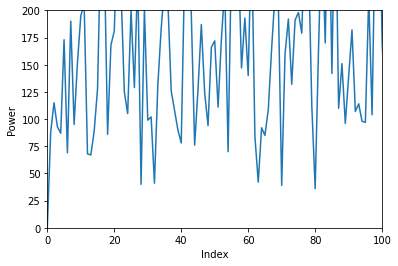

In [ ]:
import matplotlib.pyplot as plt
x_test.total.plot()
plt.ylim([0, 200])
plt.xlim([0, 100])
plt.xlabel('Index')
plt.ylabel('Power')
plt.show()

Prediction Results Plot

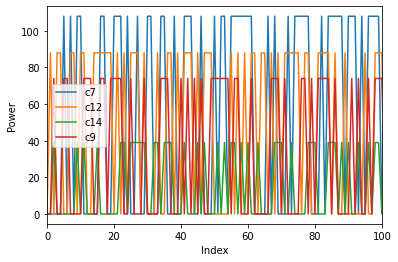

In [ ]:
prediction.plot()
plt.xlim([0, 100])
plt.xlabel('Index')
plt.ylabel('Power')
plt.show()

In [ ]:
x_test_unique_total.head(20).reset_index(drop = False)

index  total     c7    c12   c14  c9 channel
0    8571    0.0    0.0    0.0   0.0   0    c4_7
1    5684   88.0    0.0   88.0   0.0   0      c2
2    7456  115.0  115.0    0.0   0.0   0      c4
3   13190   93.0    0.0    0.0   0.0  93      c9
4    9475   87.0    0.0   87.0   0.0   0      c2
5   10446  173.0    0.0   86.0   0.0  87    c2_9
6    3917   69.0    0.0    0.0   0.0  69      c9
7   12272  190.0    0.0  122.0   0.0  68    c2_9
8   13096   95.0    0.0   95.0   0.0   0      c2
9   11384  152.0  110.0    0.0  40.0   0  c4_7_9
10   5153  195.0  110.0   85.0   0.0   0    c4_2
11  13742  206.0  120.0   84.0   0.0   0  c4_2_9
12   8925   68.0    0.0    0.0   0.0  68      c9
13  13100   67.0    0.0    0.0   0.0  67      c9
14   6614   89.0   89.0    0.0   0.0   0      c4
15   7287  128.0    0.0    0.0  39.0  89    c7_9
16   4495  269.0  112.0   90.0   0.0  67  c4_2_9
17  12819  255.0   99.0   84.0   0.0  72  c4_2_9
18   4380   86.0    0.0   86.0   0.0   0      c2
19   4523  168.0   99.0    0.0   0.0  69    c4_9

In [ ]:
y_test = pd.DataFrame(columns = ["index", "channel"])

for i in x_test_index:
  for j , row in x_test_unique_total.iterrows():
      if i == j:
        y_test = y_test.append({"index" : i, "channel": row.channel}, ignore_index = True)

y_test.drop(columns = ["channel"], inplace = True)        
y_test.head()

index
0   8571
1   5684
2   7456
3  13190
4   9475

In [ ]:
x_test_unique_total['label'] = ''
for i, row in x_test_unique_total.iterrows():
  label_str = ''
  if row.c7 != 0:
    label_str = "c7"
  if row.c12 != 0:
    label_str = label_str + "c12"
  if row.c14 != 0:
    label_str = label_str + "c14"
  if row.c9 != 0:
    label_str = label_str + "c9"
  x_test_unique_total.label[i] = label_str

x_test_unique_total.drop(columns = ["channel"], inplace = True)
x_test_unique_total.label.unique()
x_test_unique_total.tail(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


total     c7    c12   c14  c9       label
163    293.0   97.0   86.0  41.0  69  c7c12c14c9
4345   237.0  106.0    0.0  39.0  92     c7c14c9
6460   319.0  100.0   86.0  40.0  93  c7c12c14c9
6633   134.0   95.0    0.0  39.0   0       c7c14
12427  204.0  116.0   88.0   0.0   0       c7c12
3870   267.0  110.0   89.0   0.0  68     c7c12c9
351    336.0  108.0  103.0  40.0  85  c7c12c14c9
11896  289.0  131.0   90.0   0.0  68     c7c12c9
9778    75.0    0.0    0.0   0.0  75          c9
9164   229.0  104.0   86.0  39.0   0    c7c12c14
9551   120.0    0.0    0.0  40.0  80       c14c9
12575  161.0    0.0   92.0   0.0  69       c12c9
11214  138.0   99.0    0.0  39.0   0       c7c14
8442   253.0   97.0   86.0   0.0  70     c7c12c9
1391   244.0  122.0    0.0  39.0  83     c7c14c9
8484   218.0  124.0   94.0   0.0   0       c7c12
4493   210.0   99.0    0.0  39.0  72     c7c14c9
7597   300.0   99.0   85.0  40.0  76  c7c12c14c9
3886   264.0  109.0   87.0   0.0  68     c7c12c9
5790    81.0    0.0    0.0   0.0  81          c9

Fix label for appliances present in each row

In [ ]:
prediction['label'] = ''
for i, row in prediction.iterrows():
  label_str = ''
  if row.c7 != 0:
    label_str = "c7"
  if row.c12 != 0:
    label_str = label_str + "c12"
  if row.c14 != 0:
    label_str = label_str + "c14"
  if row.c9 != 0:
    label_str = label_str + "c9"
  prediction.label[i] = label_str

prediction.tail(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


c7   c12   c14    c9       label
188  108.0  88.0  39.0  74.0  c7c12c14c9
189  108.0  88.0  39.0   0.0    c7c12c14
190  108.0  88.0  39.0  74.0  c7c12c14c9
191    0.0  88.0  39.0   0.0      c12c14
192    0.0  88.0  39.0  74.0    c12c14c9
193  108.0  88.0   0.0  74.0     c7c12c9
194  108.0  88.0  39.0  74.0  c7c12c14c9
195  108.0  88.0   0.0  74.0     c7c12c9
196    0.0   0.0   0.0  74.0          c9
197  108.0  88.0  39.0   0.0    c7c12c14
198    0.0  88.0  39.0   0.0      c12c14
199    0.0  88.0   0.0  74.0       c12c9
200  108.0   0.0  39.0   0.0       c7c14
201  108.0  88.0   0.0  74.0     c7c12c9
202  108.0  88.0  39.0   0.0    c7c12c14
203  108.0   0.0  39.0  74.0     c7c14c9
204    0.0  88.0  39.0  74.0    c12c14c9
205  108.0  88.0  39.0  74.0  c7c12c14c9
206  108.0  88.0   0.0  74.0     c7c12c9
207    0.0  88.0   0.0   0.0         c12

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(x_test_unique_total.label, prediction.label))

0.6442307692307693


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(x_test_unique_total.label, prediction.label)

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  1,  0,  0,  0,  2,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  2,  0,  0,  0,  9, 12,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  8,  0,  0,  0,  0,  6,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  2, 28,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  1,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  3,  0,

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
  labels = unique_labels(y_true)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index = indices)
  return table

In [ ]:
from sklearn.metrics import classification_report
c_rep = classification_report(x_test_unique_total.label, prediction.label, zero_division= 0)
print(c_rep)

              precision    recall  f1-score   support

                   1.00      1.00      1.00         1
         c12       0.62      1.00      0.77        10
      c12c14       0.19      0.75      0.30         4
    c12c14c9       0.00      0.00      0.00         0
       c12c9       0.69      0.69      0.69        16
         c14       1.00      1.00      1.00         5
       c14c9       0.00      0.00      0.00         9
          c7       0.92      0.44      0.60        27
       c7c12       0.80      0.29      0.42        28
    c7c12c14       0.57      0.73      0.64        11
  c7c12c14c9       0.84      1.00      0.91        16
     c7c12c9       1.00      0.85      0.92        33
       c7c14       0.79      0.73      0.76        15
     c7c14c9       0.18      0.33      0.24         6
        c7c9       0.53      0.64      0.58        14
          c9       1.00      0.77      0.87        13

    accuracy                           0.64       208
   macro avg       0.63   

# ***Appliance Presence Prediction***

# Use of Output shown:

1.   **Shows which Appliances are working based on specific index.** 
2.   **Determines if Appliance was detected to be working at given index**
3.   **Gives Index where Appliance is detected to be working**







Notes For Code
*   Get predicted value for each device
*   Check each index in prediction if the device is present
*   Show the indices where the devices are present
*   Multiple Conditions are set-up to adapt to the user's needs. Presence prediction can be done for multiple devices or single devices only.





In [ ]:
c12_pred = prediction['c12'].max()
c14_pred = prediction['c14'].max()
c7_pred = prediction['c7'].max()
c9_pred = prediction['c9'].max()
print("Fridge predicted value:", c12_pred, "LCD Office predicted value:", c14_pred, "TV predicted value:", c7_pred, "HTPC predicted value:", c9_pred)


Fridge predicted value: 88.0 LCD Office predicted value: 39.0 TV predicted value: 108.0 HTPC predicted value: 74.0


In [ ]:
boolDf_all = prediction.isin([c12_pred, c14_pred, c7_pred, c9_pred])
print(boolDf_all)

        c7    c12    c14     c9  label
0    False  False  False  False  False
1    False   True  False  False  False
2    False  False   True   True  False
3    False   True  False  False  False
4    False   True  False  False  False
5     True  False  False   True  False
6    False  False  False   True  False
7     True   True  False  False  False
8    False   True  False  False  False
9     True  False   True  False  False
10    True   True  False  False  False
11   False   True   True   True  False
12   False  False  False   True  False
13   False  False  False   True  False
14   False   True  False  False  False
15   False   True   True  False  False
16    True   True  False   True  False
17    True   True  False   True  False
18   False   True  False  False  False
19   False   True  False   True  False
20    True  False  False   True  False
21    True   True  False   True  False
22    True  False   True   True  False
23   False   True   True  False  False
24    True  False  False 

In [ ]:
call_exists = prediction.loc[(prediction['c12'] == c12_pred) & (prediction['c14'] == c14_pred) & (prediction['c7'] == c7_pred) &(prediction['c9'] == c9_pred)]
print("All appliances exist in indices:", call_exists.index.values)

All appliances exist in indices: [ 84  86  98  99 113 122 130 136 151 153 155 167 179 186 187 188 190 194
 205]


In [ ]:
boolDf_c12 = prediction.isin([c12_pred])
print(boolDf_c12)

        c7    c12    c14     c9  label
0    False   True  False  False  False
1    False   True  False  False  False
2    False  False  False  False  False
3    False   True  False  False  False
4    False   True  False  False  False
5    False   True  False  False  False
6    False   True  False  False  False
7    False  False  False  False  False
8    False  False  False  False  False
9    False  False  False  False  False
10   False   True  False  False  False
11   False  False  False  False  False
12   False   True  False  False  False
13   False   True  False  False  False
14   False   True  False  False  False
15   False  False  False  False  False
16   False   True  False  False  False
17   False   True  False  False  False
18   False   True  False  False  False
19   False   True  False  False  False
20   False  False  False  False  False
21   False   True  False  False  False
22   False   True  False  False  False
23   False  False  False  False  False
24   False   True  False 

In [ ]:
c12_exists = prediction.loc[prediction['c12'] == c12_pred]
print("Fridge exists in indices:", c12_exists.index.values)

Fridge exists in indices: [  1   3   4   7   8  10  11  14  15  16  17  18  19  21  23  25  26  27
  29  33  36  37  39  41  42  43  45  47  48  49  55  57  59  61  62  64
  65  67  69  71  72  73  74  75  77  78  81  82  83  84  86  89  95  98
  99 100 104 105 107 108 110 111 113 118 119 120 122 126 127 128 129 130
 131 132 133 134 136 141 142 144 145 146 147 149 150 151 153 154 155 157
 158 159 161 162 164 167 168 169 170 171 173 174 175 176 177 179 181 184
 185 186 187 188 189 190 191 192 193 194 195 197 198 199 201 202 204 205
 206 207]


In [ ]:
boolDf_c14 = prediction.isin([c14_pred])
print(boolDf_c14)

        c7    c12    c14     c9  label
0    False  False  False  False  False
1    False  False  False  False  False
2    False  False  False  False  False
3    False  False   True  False  False
4    False  False  False  False  False
5    False  False   True  False  False
6    False  False  False  False  False
7    False  False   True  False  False
8    False  False  False  False  False
9    False  False  False  False  False
10   False  False  False  False  False
11   False  False   True  False  False
12   False  False   True  False  False
13   False  False  False  False  False
14   False  False   True  False  False
15   False  False  False  False  False
16   False  False  False  False  False
17   False  False   True  False  False
18   False  False  False  False  False
19   False  False  False  False  False
20   False  False   True  False  False
21   False  False  False  False  False
22   False  False  False  False  False
23   False  False   True  False  False
24   False  False  False 

In [ ]:
c14_exists = prediction.loc[prediction['c14'] == c14_pred]
print("LCD Office exists in indices:", c14_exists.index.values)

LCD Office exists in indices: [  2   9  11  15  22  23  25  26  27  28  29  32  33  35  36  37  41  45
  47  51  53  55  56  58  60  63  68  69  70  73  78  79  80  84  85  86
  88  90  93  96  98  99 103 113 115 116 118 120 121 122 124 125 130 135
 136 137 143 144 146 147 148 151 153 154 155 156 158 160 161 166 167 169
 171 172 173 175 176 177 179 180 181 183 186 187 188 189 190 191 192 194
 197 198 200 202 203 204 205]


In [ ]:
c12_exists = prediction.loc[prediction.iloc[:,1] == c12_pred]
print(c12_exists.index.values)

[  1   3   4   7   8  10  11  14  15  16  17  18  19  21  23  25  26  27
  29  33  36  37  39  41  42  43  45  47  48  49  55  57  59  61  62  64
  65  67  69  71  72  73  74  75  77  78  81  82  83  84  86  89  95  98
  99 100 104 105 107 108 110 111 113 118 119 120 122 126 127 128 129 130
 131 132 133 134 136 141 142 144 145 146 147 149 150 151 153 154 155 157
 158 159 161 162 164 167 168 169 170 171 173 174 175 176 177 179 181 184
 185 186 187 188 189 190 191 192 193 194 195 197 198 199 201 202 204 205
 206 207]


In [ ]:
print(prediction)

        c7   c12   c14    c9       label
0      0.0   0.0   0.0   0.0            
1      0.0  87.0   0.0  75.0       c12c9
2      0.0   0.0   0.0  75.0          c9
3    107.0   0.0  39.0  75.0     c7c14c9
4    107.0  87.0   0.0   0.0       c7c12
5      0.0  87.0  39.0  75.0    c12c14c9
6    107.0   0.0   0.0   0.0          c7
7    107.0  87.0  39.0  75.0  c7c12c14c9
8    107.0   0.0   0.0  75.0        c7c9
9      0.0  87.0   0.0   0.0         c12
10     0.0  87.0   0.0   0.0         c12
11     0.0   0.0  39.0   0.0         c14
12   107.0   0.0  39.0  75.0     c7c14c9
13   107.0  87.0   0.0   0.0       c7c12
14   107.0   0.0  39.0   0.0       c7c14
15     0.0  87.0   0.0  75.0       c12c9
16     0.0  87.0   0.0   0.0         c12
17     0.0   0.0  39.0  75.0       c14c9
18   107.0   0.0   0.0   0.0          c7
19   107.0   0.0   0.0  75.0        c7c9
20   107.0  87.0  39.0  75.0  c7c12c14c9
21   107.0   0.0   0.0  75.0        c7c9
22   107.0   0.0   0.0  75.0        c7c9
23     0.0   0.0

In [ ]:
boolDf_c7 = prediction.isin([c7_pred])
print(boolDf_c7)

        c7    c12    c14     c9  label
0    False  False  False  False  False
1    False  False  False  False  False
2    False  False  False  False  False
3     True  False  False  False  False
4     True  False  False  False  False
5    False  False  False  False  False
6     True  False  False  False  False
7     True  False  False  False  False
8     True  False  False  False  False
9    False  False  False  False  False
10   False  False  False  False  False
11   False  False  False  False  False
12    True  False  False  False  False
13    True  False  False  False  False
14    True  False  False  False  False
15   False  False  False  False  False
16   False  False  False  False  False
17   False  False  False  False  False
18    True  False  False  False  False
19    True  False  False  False  False
20    True  False  False  False  False
21    True  False  False  False  False
22    True  False  False  False  False
23   False  False  False  False  False
24   False  False  False 

In [ ]:
c7_exists = prediction.loc[prediction['c7'] == c7_pred]
print("TV exists in indices", c7_exists.index.values)

TV exists in indices [  5   7   9  10  16  17  20  21  22  24  27  30  31  34  35  38  41  42
  43  46  50  52  53  55  56  57  58  59  60  61  66  68  72  74  75  76
  77  78  82  84  85  86  87  88  90  91  92  94  96  97  98  99 101 102
 103 104 106 108 109 111 112 113 114 115 116 117 118 122 123 124 128 129
 130 131 133 134 136 137 138 139 140 141 143 145 146 147 149 150 151 152
 153 155 156 157 159 162 164 165 166 167 169 170 171 172 174 176 179 180
 181 183 185 186 187 188 189 190 193 194 195 197 200 201 202 203 205 206]


In [ ]:
boolDf_c9 = prediction.isin([c9_pred])
print(boolDf_c9)

        c7    c12    c14     c9  label
0    False  False  False  False  False
1    False  False  False   True  False
2    False  False  False   True  False
3    False  False  False   True  False
4    False  False  False  False  False
5    False  False  False   True  False
6    False  False  False  False  False
7    False  False  False   True  False
8    False  False  False   True  False
9    False  False  False  False  False
10   False  False  False  False  False
11   False  False  False  False  False
12   False  False  False   True  False
13   False  False  False  False  False
14   False  False  False  False  False
15   False  False  False   True  False
16   False  False  False  False  False
17   False  False  False   True  False
18   False  False  False  False  False
19   False  False  False   True  False
20   False  False  False   True  False
21   False  False  False   True  False
22   False  False  False   True  False
23   False  False  False  False  False
24   False  False  False 

In [ ]:
c9_exists = prediction.loc[prediction['c9'] == c9_pred]
print("HTPC exists in indices:", c9_exists.index.values)

HTPC exists in indices: [  2   5   6  11  12  13  16  17  19  20  21  22  25  29  34  35  36  40
  42  44  46  49  50  51  52  53  54  56  57  61  67  68  69  71  76  77
  79  81  82  83  84  86  91  93  96  98  99 100 102 104 105 106 107 108
 109 110 111 112 113 114 115 117 121 122 123 125 126 128 130 132 133 134
 135 136 137 138 141 142 145 148 149 151 153 155 157 159 160 161 162 163
 164 165 166 167 168 170 172 174 177 178 179 182 184 185 186 187 188 190
 192 193 194 195 196 199 201 203 204 205 206]
